<a href="https://colab.research.google.com/github/alfarizky1009/HeartDiseaseClassification/blob/main/HeartDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Heart\ Disease

/content/drive/MyDrive/Heart Disease


In [3]:
!unzip archive.zip

Archive:  archive.zip
  inflating: data.csv                


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from collections import Counter

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [6]:
df = pd.read_csv("data.csv")

In [7]:
df.head()

#Age: age in years.
#Sex: sex (1=male; 0=female).
#Cp: chest pain type (0 = typical angina; 1 = atypical angina; 2 = non-anginal pain; 3: asymptomatic).
#Trestbps: resting blood pressure in mm Hg on admission to the hospital.
#Chol: serum cholesterol in mg/dl. fbs: fasting blood sugar > 120 mg/dl (1=true; 0=false).
#Restecg: resting electrocardiographic results ( 0=normal; 1=having ST-T wave abnormality; 2=probable or definite left ventricular hypertrophy).
#Thalach: maximum heart rate achieved. Exang: exercise-induced angina (1=yes; 0=no).
#Oldpeak: ST depression induced by exercise relative to rest.
#Slope: the slope of the peak exercise ST segment (0=upsloping; 1=flat; 2=downsloping).
#Ca: number of major vessels (0–3) colored by fluorosopy.
#Thal: thalassemia (3=normal; 6=fixed defect; 7=reversable defect).
#Target: heart disease (1=no, 2=yes).

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [9]:
x = df[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]]
y = df["target"]

In [10]:
print(df['target'].value_counts().to_dict())

{1: 150, 2: 120}


In [16]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 3)

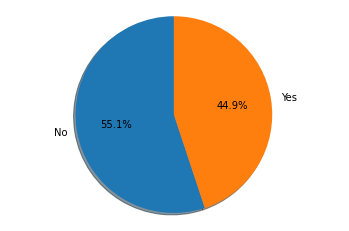

In [17]:
import matplotlib.pyplot as plt

yTrain_count = yTrain.value_counts()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'No', 'Yes'
sizes = [yTrain_count[1], yTrain_count[2]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

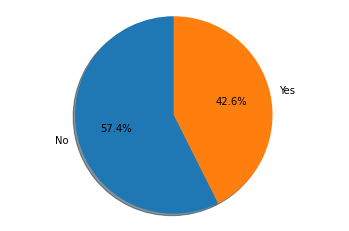

In [18]:
import matplotlib.pyplot as plt

yTest_count = yTest.value_counts()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'No', 'Yes'
sizes = [yTest_count[1], yTest_count[2]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [19]:
LogReg = LogisticRegression(max_iter=1000)
lgModel = LogReg.fit(xTrain, yTrain)

In [20]:
lgPred = lgModel.predict(xTest)

In [21]:
lgPred

array([2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 2])

In [22]:
lgPred_no = (lgPred == 1).sum()
lgPred_yes = (lgPred == 2).sum()

print(lgPred_no)
print(lgPred_yes)

31
23


In [23]:
from sklearn.metrics import confusion_matrix
lgCM = confusion_matrix(yTest, lgPred)

lgCM

array([[25,  6],
       [ 6, 17]])

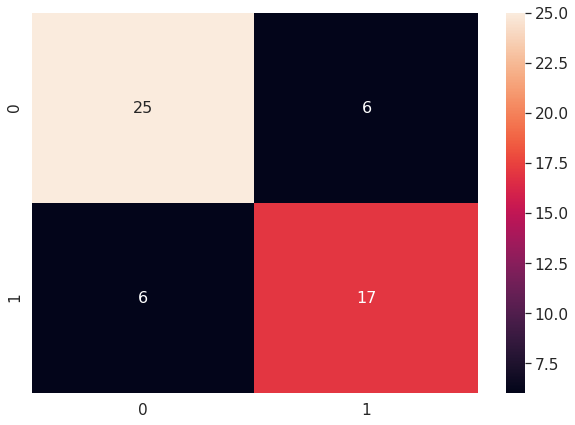

In [24]:
import seaborn as sn

lg_cm = pd.DataFrame(lgCM, range(2), range(2))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(lg_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [25]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yTest, lgPred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yTest, lgPred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yTest, lgPred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yTest, lgPred)
print('F1 score: %f' % f1)

Accuracy: 0.777778
Precision: 0.806452
Recall: 0.806452
F1 score: 0.806452


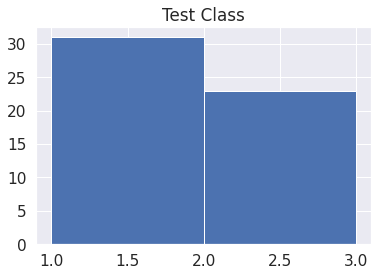

In [29]:
from matplotlib import pyplot as plt 
import numpy as np  

plt.hist(yTest, bins = [1, 2, 3]) 
plt.title("Test Class") 
plt.show()

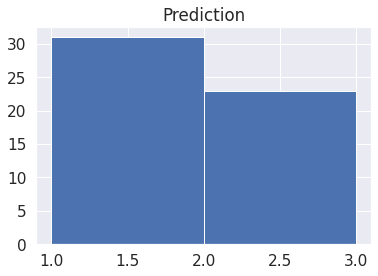

In [31]:
from matplotlib import pyplot as plt 
import numpy as np  

plt.hist(lgPred, bins = [1, 2, 3]) 
plt.title("Prediction") 
plt.show()

In [36]:
lgPred

array([2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 1, 1, 2])

In [35]:
yTest

50     2
266    1
38     1
83     1
198    1
187    1
204    2
162    1
146    2
73     1
98     1
111    1
103    2
151    1
25     1
16     2
6      2
255    1
142    2
89     2
143    1
126    2
210    2
31     1
67     2
3      1
61     2
58     2
114    1
14     1
239    1
250    2
43     1
230    2
74     1
161    2
23     1
163    2
234    1
136    1
46     2
222    1
5      1
186    2
247    1
193    2
128    1
40     2
108    2
235    2
268    1
15     1
253    1
84     1
Name: target, dtype: int64